
# Classification of  hand-written digits using scikit-learn


An example showing how we can classify hand-written digits using scikit-learn. 
The example is adapted from 

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html



Import required python packages

In [471]:
from sklearn import datasets, svm, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#set a random state
np.random.seed(30)


Load the dataset

In [472]:
digits = datasets.load_digits()

Print the dataset. The dataset consists of two main parts:
1. digits.data is the input (flattened pixel values for each handwritten image)

2. digits.target is the output (ground-truth labels)


In [473]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

We can obtain the number of data points using .shape command 

In [474]:
digits.data.shape

(1797, 64)

plot the digits.data with associated labels

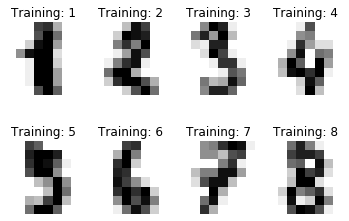

In [475]:
fig = plt.figure()
for index in range(8):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(digits.data[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[index+1])

Pixel values will be the input (X) and labels will be the output (y)

In [476]:
X = digits.data
y= digits.target

Split data into train and test subsets

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True)

Import different classifiers

In [478]:
# Multinomial Naive Bayes Classifier  
def naive_bayes_classifier(train_x, train_y):   
    model = MultinomialNB(alpha=0.01)  
    model.fit(train_x, train_y)  
    return model  
  
  
# KNN Classifier  
def knn_classifier(train_x, train_y):   
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_x, train_y)  
    return model  
  
  
# Logistic Regression Classifier  
def logistic_regression_classifier(train_x, train_y):    
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model  
  
  
# Random Forest Classifier  
def random_forest_classifier(train_x, train_y):    
    model = RandomForestClassifier(n_estimators=50)  
    model.fit(train_x, train_y)  
    return model  
  
  

  
# GBDT(Gradient Boosting Decision Tree) Classifier  
def gradient_boosting_classifier(train_x, train_y):   
    model = GradientBoostingClassifier(n_estimators=200)  
    model.fit(train_x, train_y)  
    return model  
  
  
# SVM Classifier  
def svm_classifier(train_x, train_y):    
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model  
  
#MLP Classifier
def mlp_classifier(train_x,train_y):
    model =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    model.fit(train_x,train_y)
    return model

Choose a classifier:

In [479]:
model = svm_classifier(X_train, y_train)

Now predict the value of the digit of the test dataset

In [480]:
predicted = model.predict(X_test)

Compute the prediction accuracy

In [481]:
accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy : %.2f%%' % (100 * accuracy))

classification accuracy : 98.33%


plot test data with predicted labels

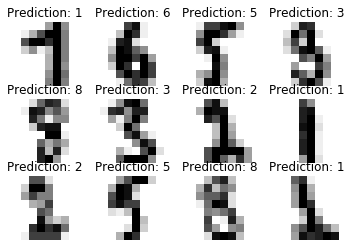

In [482]:
fig = plt.figure()
for index in range(12):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(X_test[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % predicted[index+1])

We want to know the classification accuracy for each number. We can use a for loop to do it

In [483]:
#assign an empty list
num_acc = []

In [484]:
for i in range (10):
    #find the index of each number (0 to 9) in the label
    idx = np.where(y_test == i)
    num_acc.append(metrics.accuracy_score(y_test[idx], predicted[idx]))

We can print each line in the above loop to see what is going on

In [485]:
#find the index of number 9 in the label
idx = np.where(y_test == 9)

In [486]:
y_test[idx]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [487]:
predicted[idx]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 5, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9])

In [488]:
#compute the accuracy between ground truth and ml predicted label
metrics.accuracy_score(y_test[idx], predicted[idx])

0.9545454545454546

In [489]:
num_acc

[0.9880952380952381,
 1.0,
 1.0,
 0.9629629629629629,
 0.9791666666666666,
 1.0,
 0.99,
 1.0,
 0.9512195121951219,
 0.9545454545454546]

Plot the prediction accuracy for each label (0 to 9)

Text(0, 0.5, 'prediction accuracy')

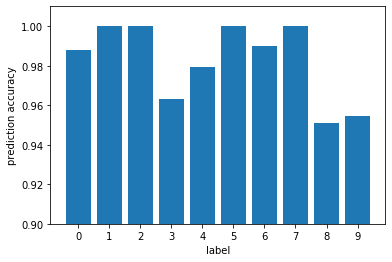

In [490]:
plt.bar(np.arange(0,10,1),num_acc)
plt.ylim(0.9,1.01)
plt.xticks(np.arange(0,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')

### Imbalanced dataset

Now we want to explore how an imbalanced dataset will impact on the classification accuracy. The previous dataset we have is pretty balanced. We can use a histogram to visualize the frequency for each label

Text(0, 0.5, 'frequency')

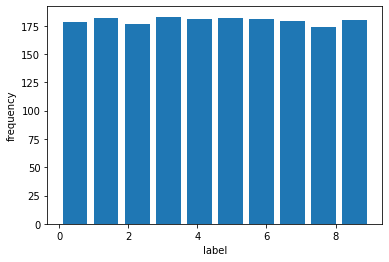

In [491]:
plt.hist (y, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')


We will create an imbalanced dataset by removing half 0s in the dataset

In [492]:
#find the index of label 1 
idx_1 = np.where(y==8)[0]

In [493]:
y[idx_1]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [494]:
#delete 67% ones from y
y_imba = np.delete(y,idx_1[:len(idx_1)//2],None)

In [495]:
len(idx_1)

174

Text(0, 0.5, 'frequency')

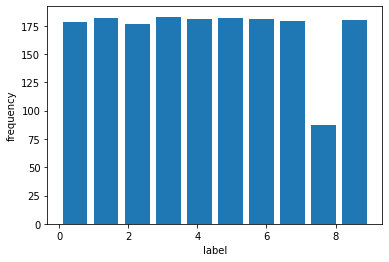

In [496]:
plt.hist (y_imba, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')

In [497]:
#delete half of ones from x
X_imba = np.delete(X,idx_1[:len(idx_1)//2],0)

In [498]:
X_train_imba, X_test_imba, y_train_imba, y_test_imba = train_test_split(
    X_imba, y_imba, test_size=0.5, shuffle=True)



Choose a classifier:


In [499]:
model_imba = svm_classifier(X_train_imba, y_train_imba)



Now predict the value of the digit of the test dataset


In [500]:
predicted_imba = model_imba.predict(X_test_imba)


In [501]:
#compute the accuracy for all labels in the imbalanced dataset
accuracy_imba = metrics.accuracy_score(y_test_imba, predicted_imba)

accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy of original datasset : %.2f%%' % (100 * accuracy))
print ('classification accuracy of imbalanced datasset : %.2f%%' % (100 * accuracy_imba))

classification accuracy of original datasset : 98.33%
classification accuracy of imbalanced datasset : 97.43%


In [502]:
num_acc_imba = []

for i in range (10):
    #find the index of each number (0 to 9) in the label
    idx = np.where(y_test_imba == i)
    num_acc_imba.append(metrics.accuracy_score(y_test_imba[idx], predicted_imba[idx]))

Plot the prediction accuracy for each label (0 to 9)

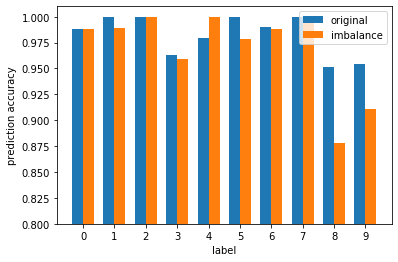

In [503]:
width = 0.35  # the width of the bars
plt.bar(np.arange(0,10,1)-width/2,num_acc,width, label = 'original')
plt.bar(np.arange(0,10,1)+width/2,num_acc_imba, width,label = 'imbalance')
plt.ylim(0.8,1.01)
plt.xticks(np.arange(0,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')
plt.legend()